In [2]:
!pip install spectral
from spectral import envi # load envi module

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive
!ls

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive
'Colab Notebooks'   project3.py   test_RT.hdr   核桃_RT.raw
 HSI		    test	  核桃_RT.hdr


In [6]:
file_name = "/gdrive/MyDrive/核桃_RT.hdr" # or use 'os.listdir' to list files inside the folder
data = envi.open(file_name) # if .hdr and .raw has different name, use envi.open(HDR_NAME, RAW_NAME)

In [7]:
print(type(data))
print(data)

<class 'spectral.io.bilfile.BilFile'>
	Data Source:   '/gdrive/MyDrive/核桃_RT.raw'
	# Rows:           1341
	# Samples:         640
	# Bands:           224
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32


In [8]:
print(type(data.metadata['wavelength']))
print(data.metadata['wavelength'])

<class 'list'>
['935.610000', '939.060000', '942.520000', '945.980000', '949.430000', '952.890000', '956.350000', '959.810000', '963.270000', '966.730000', '970.190000', '973.650000', '977.110000', '980.580000', '984.040000', '987.510000', '990.970000', '994.430000', '997.900000', '1001.370000', '1004.830000', '1008.300000', '1011.770000', '1015.240000', '1018.710000', '1022.180000', '1025.650000', '1029.120000', '1032.590000', '1036.060000', '1039.530000', '1043.000000', '1046.480000', '1049.950000', '1053.430000', '1056.900000', '1060.380000', '1063.850000', '1067.330000', '1070.810000', '1074.290000', '1077.760000', '1081.240000', '1084.720000', '1088.200000', '1091.680000', '1095.170000', '1098.650000', '1102.130000', '1105.610000', '1109.100000', '1112.580000', '1116.070000', '1119.550000', '1123.040000', '1126.520000', '1130.010000', '1133.500000', '1136.990000', '1140.470000', '1143.960000', '1147.450000', '1150.940000', '1154.430000', '1157.930000', '1161.420000', '1164.910000'

In [9]:
np_data = data.asarray() # convert to numpy
print(type(np_data))
print(np_data.shape) # (row, sample, band)

<class 'numpy.memmap'>
(1341, 640, 224)


In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


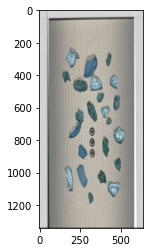

In [11]:
# show false-color image
import numpy as np

fig, ax = plt.subplots()

default_bands = [192, 134, 76] # index the (R, G, B)
false_color_data = np_data[..., default_bands]

# normalize data
d_max = np.max(false_color_data)
d_min = np.min(false_color_data)
normaled_data = (false_color_data - d_min) / (d_max - d_min)


ax.imshow(normaled_data) # view the single band and show as gray-scale image

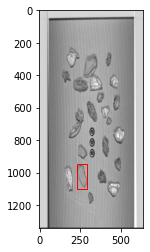

In [12]:
# show ROI
fig, ax = plt.subplots()
ax.imshow(np_data[..., 70], 'gray') # view the single band and show as gray-scale image

# ROI coordinates
x1, y1 = 230, 950
x2, y2 = 290, 1100

ax.add_patch( # create a rectangle patch 
  patches.Rectangle( # ref: https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
    (x1, y1),
    x2 - x1,
    y2 - y1,
    edgecolor='red',
    fill=False
  )
)

In [13]:
# slice data use coord
roi_data = np_data[y1:y2, x1:x2] # NOTICE!! you need swap the coordinates when slice data 
print(roi_data.shape)
print(roi_data)

(150, 60, 224)
[[[0.79609174 0.66830057 0.6943089  ... 0.8894909  0.89019156 0.9031686 ]
  [0.80892247 0.6693418  0.63406944 ... 0.8935769  0.89696014 0.9111631 ]
  [0.8241206  0.701923   0.7068146  ... 0.90841794 0.9096455  0.9206161 ]
  ...
  [0.8231611  0.6924267  0.74550897 ... 0.9226957  0.92259    0.92533153]
  [0.81240195 0.68672836 0.75373137 ... 0.9293835  0.93168974 0.9239933 ]
  [0.78901964 0.704441   0.76112753 ... 0.91656625 0.915859   0.91448087]]

 [[0.8045879  0.7009803  0.67804873 ... 0.8843309  0.8860044  0.8933281 ]
  [0.800505   0.68539315 0.66561514 ... 0.8935769  0.89381546 0.90531856]
  [0.79061973 0.66987175 0.659271   ... 0.90325356 0.90859365 0.9146919 ]
  ...
  [0.8153364  0.6924267  0.6856288  ... 0.92749226 0.92430073 0.92702085]
  [0.8202512  0.7021605  0.7089552  ... 0.9269816  0.9299777  0.9307047 ]
  [0.81254905 0.704441   0.6869436  ... 0.9213844  0.9192898  0.9203846 ]]

 [[0.79609174 0.7009803  0.7105691  ... 0.87659097 0.87867683 0.8913599 ]
  [0.79

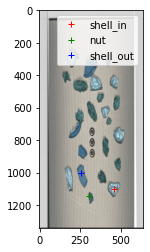

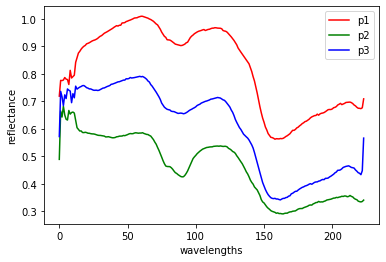

In [14]:
# any coordinate you want to plot
#Green: Nut、Red: Shell-inside、Blue: Shell-outside
x1, y1 = 460, 1100 #red
x2, y2 = 305, 1145 #green
x3, y3 = 255, 1000 #blue

# mark in false-color image
fig, ax = plt.subplots()
ax.imshow(normaled_data)
ax.plot(x1, y1, 'r+', label="shell_in")
ax.plot(x2, y2, 'g+', label="nut")
ax.plot(x3, y3, 'b+', label="shell_out")
ax.legend()


# index the spectral data
# NOTICE!! you need swap the coordinates when slice data
p1 = np_data[y1, x1]
p2 = np_data[y2, x2]
p3 = np_data[y3, x3]

# plot spectrum
fig, ax = plt.subplots()
ax.set_xlabel("wavelengths")
ax.set_ylabel("reflectance")
ax.plot(p1, 'r', label="p1")
ax.plot(p2, 'g', label="p2")
ax.plot(p3, 'b', label="p3")
ax.legend()

In [15]:
def SAM(x,y):
    val = np.dot(np.transpose(x), y)/(np.linalg.norm(x)*np.linalg.norm(y))
    return val

In [16]:
#SHELL_IN
point_R1 = normaled_data[1100][460][0]
point_G1 = normaled_data[1100][460][1]
point_B1 = normaled_data[1100][460][2]

point1 = np.array([point_R1, point_G1, point_B1])
SAM_point1 = np.full ((normaled_data.shape[0], normaled_data.shape[1]), 0.0)

In [17]:
#NUT
point_R2 = normaled_data[1145][305][0]
point_G2 = normaled_data[1145][305][1]
point_B2 = normaled_data[1145][305][2]

point2 = np.array([point_R2, point_G2, point_B2])
SAM_point2 = np.full ((normaled_data.shape[0], normaled_data.shape[1]), 0.0)

In [18]:
#SHELL_OUT
point_R3 = normaled_data[1000][255][0]
point_G3 = normaled_data[1000][255][1]
point_B3 = normaled_data[1000][255][2]

point3 = np.array([point_R3, point_G3, point_B3])
SAM_point3 = np.full ((normaled_data.shape[0], normaled_data.shape[1]), 0.0)

In [19]:
for i in range (normaled_data.shape[0]):
    for j in range (normaled_data.shape[1]):
        rgb = np.array([normaled_data[i][j][0], normaled_data[i][j][1], normaled_data[i][j][2]])
        img_result1 = SAM(rgb, point1)
        img_result2 = SAM(rgb, point2)
        img_result3 = SAM(rgb, point3)

        SAM_point1[i][j] = img_result1
        SAM_point2[i][j] = img_result2
        SAM_point3[i][j] = img_result3

<ipython-input-15-647918a6559f>:2: RuntimeWarning: invalid value encountered in float_scalars
  val = np.dot(np.transpose(x), y)/(np.linalg.norm(x)*np.linalg.norm(y))


[[0.98947626 0.99036038 0.99038303 ... 0.99016184 0.98911095 0.98817188]
 [0.98958832 0.98939031 0.98891979 ... 0.98894668 0.988846   0.98877543]
 [0.98697531 0.98824358 0.98864526 ... 0.98985034 0.98947328 0.98956484]
 ...
 [0.9878425  0.98822165 0.98862928 ... 0.99009144 0.98971027 0.98973274]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


<function matplotlib.pyplot.show(*args, **kw)>

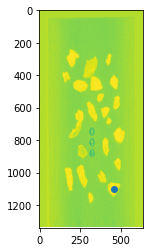

In [27]:
print(SAM_point1)
plt.figure()
plt.imshow(SAM_point1)
plt.plot(460,1100, "o")
plt.show

[[0.98796105 0.98897284 0.98889244 ... 0.98881865 0.98765856 0.98667645]
 [0.98807752 0.9878903  0.98759723 ... 0.98752743 0.98741812 0.98728722]
 [0.98526222 0.98662663 0.98702455 ... 0.98832691 0.98791111 0.98811394]
 ...
 [0.98620737 0.98676503 0.98717016 ... 0.98863119 0.98826671 0.98819816]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


<function matplotlib.pyplot.show(*args, **kw)>

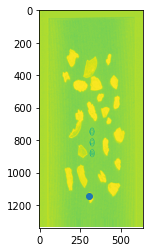

In [29]:
print(SAM_point2)
plt.figure()
plt.imshow(SAM_point2)
plt.plot(305, 1145, "o")
plt.show

[[0.98094201 0.98206288 0.98217827 ... 0.98175311 0.98039001 0.97914624]
 [0.98109275 0.98081136 0.98003131 ... 0.98013997 0.98000938 0.97996026]
 [0.97771484 0.97934252 0.97989219 ... 0.98146528 0.98097736 0.98101169]
 ...
 [0.97881484 0.97918344 0.97973818 ... 0.98174721 0.98120642 0.98131186]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


<function matplotlib.pyplot.show(*args, **kw)>

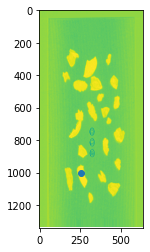

In [30]:
print(SAM_point3)
plt.figure()
plt.imshow(SAM_point3)
plt.plot(255, 1000, "o")
plt.show

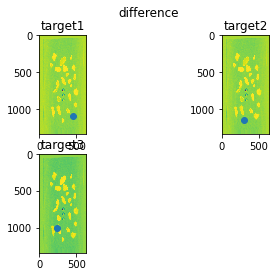

In [36]:
fig = plt.figure()
fig.suptitle("difference")

ax = fig.add_subplot(221)
ax.title.set_text('target1')
plt.plot(460,1100, "o")
ax.imshow(SAM_point1,interpolation='nearest')

ax1 = fig.add_subplot(222)
ax1.title.set_text('target2')
plt.plot(305, 1145, "o")
ax1.imshow(SAM_point2,interpolation='nearest')

ax2 = fig.add_subplot(223)
ax2.title.set_text('target3')
plt.plot(240, 1000, "o")
ax2.imshow(SAM_point3,interpolation='nearest')

<function matplotlib.pyplot.show(*args, **kw)>

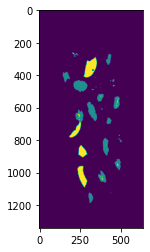

In [37]:
target = np.full ((normaled_data.shape[0], normaled_data.shape[1]),0.0)
#print(target)

for i in range (normaled_data.shape[0]):
    for j in range (normaled_data.shape[1]):
        target[i][j]=np.argmax([SAM_point1[i][j], SAM_point2[i][j], SAM_point3[i][j]])

#print(target)
plt.figure()
plt.imshow(target)
plt.show

In [38]:
#BACKGROUND
point_R4 = normaled_data[100][200][0]
point_G4 = normaled_data[100][200][1]
point_B4 = normaled_data[100][200][2]

point4 = np.array([point_R4, point_G4, point_B4])
SAM_point4 = np.full ((normaled_data.shape[0], normaled_data.shape[1]), 0.0)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<function matplotlib.pyplot.show(*args, **kw)>

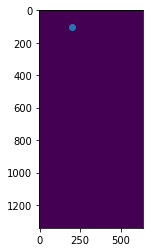

In [39]:
print(SAM_point4)
plt.figure()
plt.imshow(SAM_point4)
plt.plot(200,100, "o")
plt.show

In [40]:
target[1000]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

<function matplotlib.pyplot.show(*args, **kw)>

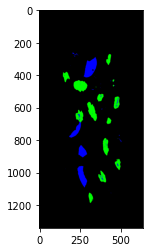

In [41]:
for i in range (normaled_data.shape[0]):
    for j in range (normaled_data.shape[1]):
        if target[i,j] == 0:
            normaled_data[i,j] = [0,0,0]
        if target[i,j] == 1:
            normaled_data[i,j] = [0,255,0]
        if target[i,j] == 2:
            normaled_data[i,j] = [0,0,255]
        if target[i,j] == 3:
            normaled_data[i,j] = [255,0,0]
            
plt.imshow(normaled_data)
plt.show


In [42]:
import numpy as np
from sklearn.metrics import accuracy_score
import os
from google.colab import files

pred = target # place your classification result array in here

!wget -N 'https://github.com/qaz10102030/test/raw/master/ground-truth.npy'
true = np.load('./ground-truth.npy')

assert pred.shape == true.shape
print(accuracy_score(true.reshape(-1), pred.reshape(-1)))

--2022-12-22 07:10:59--  https://github.com/qaz10102030/test/raw/master/ground-truth.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qaz10102030/test/master/ground-truth.npy [following]
--2022-12-22 07:10:59--  https://raw.githubusercontent.com/qaz10102030/test/master/ground-truth.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6866048 (6.5M) [application/octet-stream]
Saving to: ‘ground-truth.npy’

ground-truth.npy    100%[===================>]   6.55M  42.1MB/s    in 0.2s    

Last-modified header missing -- time-stamps turned off.
2022-12-22 07:10:59 (42.1 MB/s) - ‘ground-truth.npy’ s